In [1]:
import sys 
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
import warnings
import seaborn as sns
# To suppress all warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import  r2_score as r2
from tqdm import tqdm

In [2]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler

In [3]:
%load_ext autoreload
%autoreload 2
from database import Magneticum
from relation import Scaling
from relation import Distribution
from relation import Analysis
from relation import RandomForest

In [4]:
def data_manupulation(df):
    dff = df.copy()
    dff.Vnet = dff.Vnet.apply(lambda x: x/1e5)
    dff.Vz = dff.Vz.apply(lambda x: x/1e5)
    dff.Mstar = dff.Mstar.apply(lambda x: np.log(x))
    #ss = StandardScaler()
    #dff['Vnet'] = ss.fit_transform(dff['Vnet'].values.reshape(-1,1))
    #dff['Vz'] = ss.fit_transform(dff['Vz'].values.reshape(-1,1))
    #dff['Mstar'] = ss.fit_transform(dff['Mstar'].values.reshape(-1,1))
    #dff['M'] = ss.fit_transform(dff['M'].values.reshape(-1,1))
    #dff['Yksz'] = ss.fit_transform(dff['Yksz'].values.reshape(-1,1))
    return dff

In [5]:
best = {'max_depth': 50,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [6]:
snaps = ['140','132','120','096','076','060']

In [16]:
dfs = []
for snap in snaps:
    a = Analysis(50,snap,'')
    dfs.append(a.get_dataframe())

In [27]:
dfs = dfs[::-1]

In [45]:
S = np.linspace(30,2,len(snaps))
A = np.linspace(1,.2,len(snaps))[::-1]

In [50]:
len(S)

6

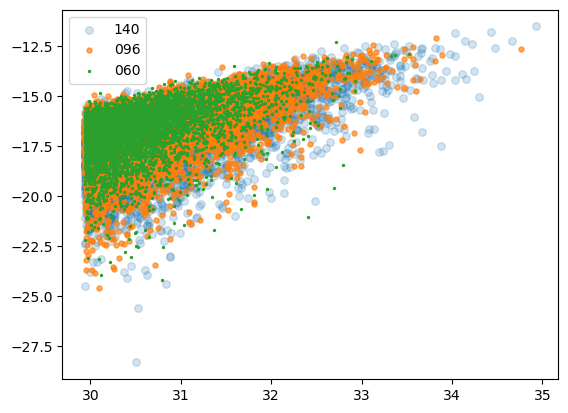

In [54]:
for i,snap in enumerate(snaps):
    if i in [1,2,4,]:
        continue
    df = dfs[i]
    plt.scatter(df.M,df.Yksz,label=snap,alpha=A[i],s=S[i])
plt.legend()

In [8]:

r2_score = {}
a = Analysis(50,snaps[0],'')
df = data_manupulation(a.get_dataframe())
rf = RandomForest(df)
rf.split_data(test_size=0.8)
X_train, y_train = rf.get_data('train')
X_test, y_test = rf.get_data('test')


In [9]:
rf.best_hyperparameters = best
regressor_M = rf.fitted_model(['M'])
regressor_M_Vz = rf.fitted_model(['M','Vz'])
regressor_M_Mstar = rf.fitted_model(['M','Mstar'])
regressor_M_Mstar_Vz = rf.fitted_model(['M','Mstar','Vz'])
r2_score['M'] = {}
r2_score['M'][f"train_{snaps[0]}"] = r2(y_train,regressor_M.predict(X_train['M'].values.reshape(-1, 1)))
r2_score['M'][f"test_{snaps[0]}"] = r2(y_test,regressor_M.predict(X_test['M'].values.reshape(-1, 1)))
r2_score['M_Vz'] = {}
r2_score['M_Vz'][f"train_{snaps[0]}"] = r2(y_train,regressor_M_Vz.predict(X_train[['M','Vz']].values.reshape(-1, 2)))
r2_score['M_Vz'][f"test_{snaps[0]}"] = r2(y_test,regressor_M_Vz.predict(X_test[['M','Vz']].values.reshape(-1, 2)))
r2_score['M_Mstar'] = {}
r2_score['M_Mstar'][f"train_{snaps[0]}"] = r2(y_train,regressor_M_Mstar.predict(X_train[['M','Mstar']].values.reshape(-1, 2)))
r2_score['M_Mstar'][f"test_{snaps[0]}"] = r2(y_test,regressor_M_Mstar.predict(X_test[['M','Mstar']].values.reshape(-1, 2)))
r2_score['M_Mstar_Vz'] = {}
r2_score['M_Mstar_Vz'][f"train_{snaps[0]}"] = r2(y_train,regressor_M_Mstar_Vz.predict(X_train[['M','Mstar','Vz']].values.reshape(-1, 3)))
r2_score['M_Mstar_Vz'][f"test_{snaps[0]}"] = r2(y_test,regressor_M_Mstar_Vz.predict(X_test[['M','Mstar','Vz']].values.reshape(-1, 3)))

    # #df = data_manupulation(df)
    # rf = RandomForest(df)
    # rf.split_data(test_size=0.8)
    # rf.best_hyperparameters = best
    # rf.fit_with_hyperparameters(['M'],'Yksz')
    # rf.fit_with_hyperparameters(['M','Vz'],'Yksz')
    # rf.fit_with_hyperparameters(['M','Mstar'],'Yksz')
    # rf.fit_with_hyperparameters(['M','Mstar','Vz'],'Yksz')
    # r2_scores.append(rf.r2_scores)
    # rmse_scores.append(rf.rmse_scores)

In [10]:
for snap in tqdm(snaps[1:],desc='Testing on other snapshots',unit='snap'):
    a = Analysis(50,snap,'')
    df = data_manupulation(a.get_dataframe())
    rf = RandomForest(df)
    rf.split_data(test_size=0.8)
    X_test, y_test = rf.get_data('test')
    r2_score['M'][f"test_{snap}"] = r2(y_test,regressor_M.predict(X_test['M'].values.reshape(-1, 1)))
    r2_score['M_Vz'][f"test_{snap}"] = r2(y_test,regressor_M_Vz.predict(X_test[['M','Vz']].values.reshape(-1, 2)))
    r2_score['M_Mstar'][f"test_{snap}"] = r2(y_test,regressor_M_Mstar.predict(X_test[['M','Mstar']].values.reshape(-1, 2)))
    r2_score['M_Mstar_Vz'][f"test_{snap}"] = r2(y_test,regressor_M_Mstar_Vz.predict(X_test[['M','Mstar','Vz']].values.reshape(-1, 3)))


Testing on other snapshots:   0%|          | 0/5 [00:00<?, ?snap/s]

Testing on other snapshots: 100%|██████████| 5/5 [00:56<00:00, 11.27s/snap]


In [11]:
r2_scoreII = r2_score.copy()

In [12]:
for key, inner_dict in r2_scoreII.items():
    for inner_key, value in inner_dict.items():
        r2_scoreII[key][inner_key] = round(value, 2)


In [13]:
data = r2_scoreII

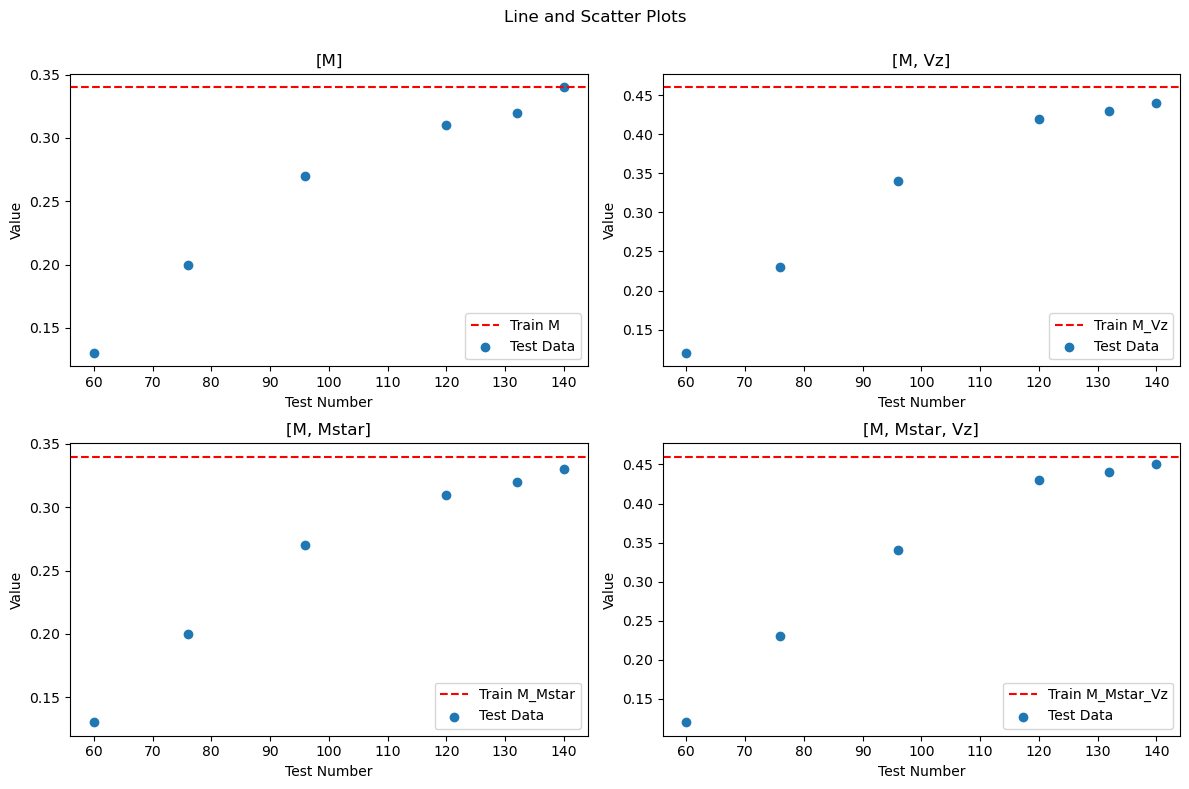

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Line and Scatter Plots')
subplot_labels = ['[M]', '[M, Vz]', '[M, Mstar]', '[M, Mstar, Vz]']

for i, key in enumerate(data.keys()):
    # Extract the train data and test data
    train_data = data[key]['train_140']
    test_data = {k: v for k, v in data[key].items() if 'test_' in k}
    
    # Plot a horizontal line for train data
    axs[i // 2, i % 2].axhline(y=train_data, color='r', linestyle='--', label=f'Train {key}')
    
    # Plot test data as scatter points
    test_x = [int(k.split('_')[1]) for k in test_data.keys()]
    test_y = list(test_data.values())
    axs[i // 2, i % 2].scatter(test_x, test_y, label='Test Data')
    
    # Set subplot titles and legends
    axs[i // 2, i % 2].set_title(subplot_labels[i])
    axs[i // 2, i % 2].set_xlabel('Test Number')
    axs[i // 2, i % 2].set_ylabel('Value')
    axs[i // 2, i % 2].legend()

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)